In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d0 = pd.read_csv('mnist_train.csv')

In [3]:
d0.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
l = d0['label']

In [5]:
d = d0.drop('label', axis = 1)

In [6]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


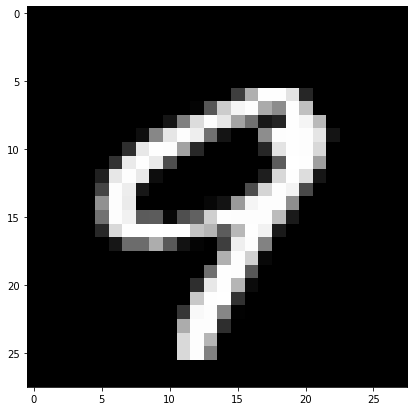

9


In [7]:
plt.figure(figsize = (7,7))
idx = 100

#reshape from 1d to 2d
grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation = 'none', cmap = 'gray')
plt.show()

print(l[idx])

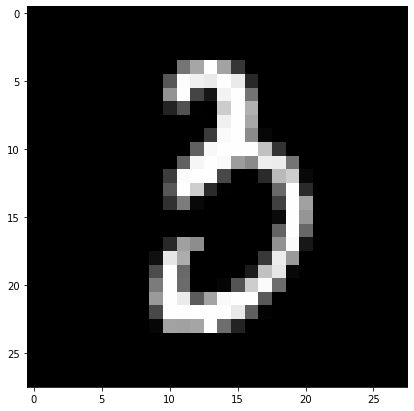

3


In [8]:
plt.figure(figsize = (7,7))
idx = 150

#reshape from 1d to 2d
grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation = 'none', cmap = 'gray')
plt.show()

print(l[idx])

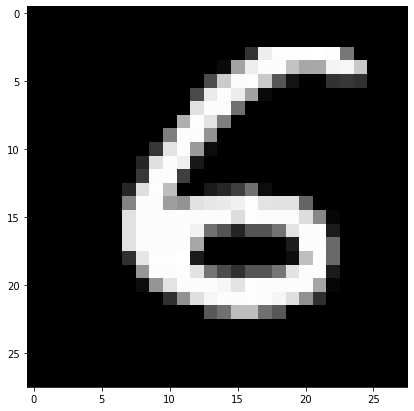

6


In [9]:
plt.figure(figsize = (7,7))
idx = 270

#reshape from 1d to 2d
grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation = 'none', cmap = 'gray')
plt.show()

print(l[idx])

### Pick first 15k data points/records to work on for time-efficiency.

In [10]:
label = l.head(15000)
data = d.head(15000)

print('the shape of sample data = ', data.shape)

the shape of sample data =  (15000, 784)


In [11]:
# Data Preprocessing: standardizing the data

from sklearn. preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [12]:
# Co-variance matrix is A^T *A
sample_data = standardized_data

# Matrix Multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)
print('The shape of variance matrix = ', covar_matrix.shape)

The shape of variance matrix =  (784, 784)


Observation: The shape of sample_data was (15000, 784) and we just multiplied it with the transpose of sample_data to convert the shape to (784, 784)

### Finding the top 2 eigen values and corresponding eigen vectors for projecting onto a 2 dimension space.

In [13]:
from scipy.linalg import eigh

values, vectors = eigh(covar_matrix, eigvals = (782,783))
print('shape of eigen vectors = ', vectors.shape)

vectors = vectors.T
print('updated shape of eigen vectors = ', vectors.shape)

shape of eigen vectors =  (784, 2)
updated shape of eigen vectors =  (2, 784)


Observations: The parameters will be defined from low to high values as per the function of eigh.
eigh function will return the eigen values in ascending order.

The code we have written only give us the top 2 (782,783) eigen values.
Later we converted them to (2,d) dimensional space for ease.

when we update them those become our 1st PCA and 2nd PCA

In [14]:
# Projecting the original data sample on the plane formed by two principal eigen vectors by vector-vector multiplication
new_coordinates = np.matmul(vectors,sample_data.T)
print('Resultant new data points shape ', vectors.shape, 'X',sample_data.T.shape)

Resultant new data points shape  (2, 784) X (784, 15000)


Resultant new data points shape will be (2, 15k)

In [15]:
# Appending label to the 2 dimension Projected data
new_coordinates = np.vstack((new_coordinates,label)).T
# given (()) becasue vstack only take 1 argument and we passed 2
# vstack stacks the datapoints in a vertical manner

dataframe = pd.DataFrame(data = new_coordinates, columns = ('1st Principal', '2nd Principal','labels'))
print(dataframe.head())

   1st Principal  2nd Principal  labels
0      -5.558661      -5.043558     1.0
1       6.193635      19.305278     0.0
2      -1.909878      -7.678775     1.0
3       5.525748      -0.464845     4.0
4       6.366527      26.644289     0.0


c:\users\91974\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


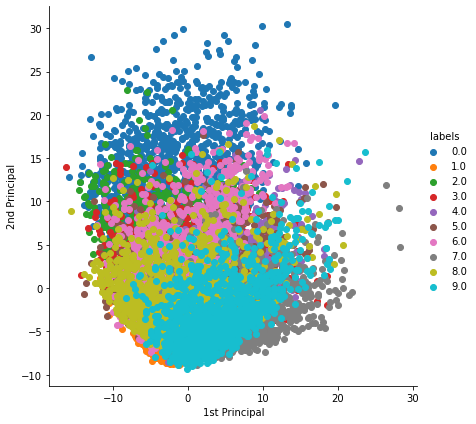

In [16]:
sns.FacetGrid(dataframe, hue = 'labels', size = 6).map(plt.scatter, '1st Principal', '2nd Principal').add_legend()
plt.show()

Observations:
(1) 0 and 9 can be easily identified as a group or a set of common points respectively but there is a lot of overlap
(2) PCA did a decent job to categorize the values

## Note: 
In the above code we have done a lot of mathematical computation and calculated the eigen vectors and eigen values manually

It shows a deeper understanding of mathematical formulation and matrices(How eigen values and eigen vectors are import in calculating the PCA for a given dataset)

we could have done it using the Scikit-Learn Library in 3-4 simple steps

## PCA using Scikit-Learn Library

In [17]:
# Initializing the PCA
from sklearn import decomposition
pca = decomposition.PCA()

In [18]:
# Configuring the paramenters
# Number of components set to 2
pca.n_components = 2 
pca_data = pca.fit_transform(sample_data)

#pca will reduce the data from 784 to d dimension and try to preserver the information from the data points
print('Shape of pca =', pca_data.shape)


Shape of pca = (15000, 2)


c:\users\91974\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


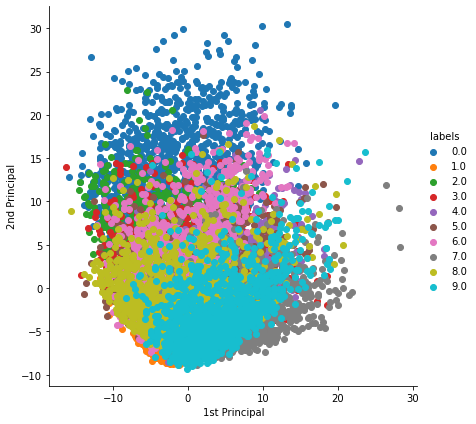

In [19]:
# attaching the label for each 2 dimensional point
pca_data = np.vstack((pca_data.T,label)).T

#creating a new dataframe which help us in plotting the resultant data
pca_df = pd.DataFrame(data=pca_data,columns = ('1st Princial', '2nd Principal', 'labels'))
sns.FacetGrid(dataframe, hue = 'labels', size = 6).map(plt.scatter, '1st Principal', '2nd Principal').add_legend()
plt.show()